# Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
from tqdm.notebook import tqdm
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Data acquisition

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
nltk.corpus.twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [4]:
all_corpus = nltk.corpus.twitter_samples.strings('tweets.20150430-223406.json')
positive_corpus = nltk.corpus.twitter_samples.strings('positive_tweets.json')
negative_corpus = nltk.corpus.twitter_samples.strings('negative_tweets.json')

In [5]:
len(all_corpus), len(positive_corpus), len(negative_corpus)

(20000, 5000, 5000)

In [6]:
all_corpus[:5]

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…',
 'RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1',
 "RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…"]

In [7]:
positive_corpus[:5]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

In [8]:
negative_corpus[:5]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(']

# Tokenization

In [9]:
all_corpus_tokens = []
positive_corpus_tokens = []
negative_corpus_tokens = []

In [10]:
for tweet in tqdm(all_corpus):
    tokens = nltk.word_tokenize(tweet)
    for token in tokens:
        all_corpus_tokens.append(token)
for tweet in tqdm(positive_corpus):
    tokens = nltk.word_tokenize(tweet)
    for token in tokens:
        positive_corpus_tokens.append(token)
for tweet in tqdm(negative_corpus):
    tokens = nltk.word_tokenize(tweet)
    for token in tokens:
        negative_corpus_tokens.append(token)

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

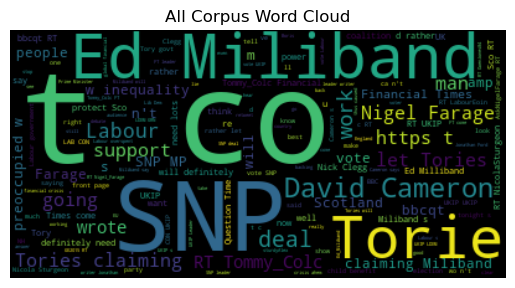

In [11]:
all_corpus_wordcloud = WordCloud().generate(' '.join(all_corpus_tokens))
plt.imshow(all_corpus_wordcloud, interpolation='bilinear')
plt.title("All Corpus Word Cloud")
plt.axis("off")
plt.show()

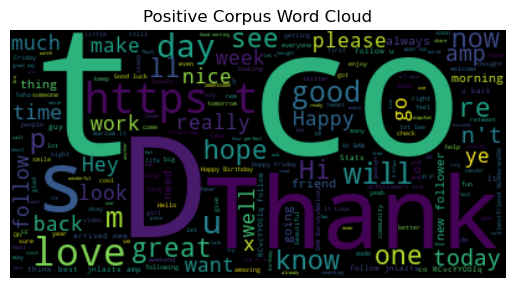

In [12]:
positive_corpus_wordcloud = WordCloud().generate(' '.join(positive_corpus_tokens))
plt.imshow(positive_corpus_wordcloud, interpolation='bilinear')
plt.title("Positive Corpus Word Cloud")
plt.axis("off")
plt.show()

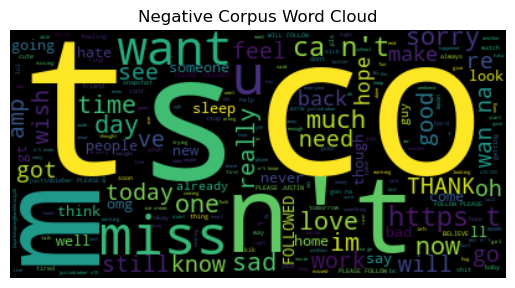

In [13]:
negative_corpus_wordcloud = WordCloud().generate(' '.join(negative_corpus_tokens))
plt.imshow(negative_corpus_wordcloud, interpolation='bilinear')
plt.title("Negative Corpus Word Cloud")
plt.axis("off")
plt.show()

# POS Tagging

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
all_corpus_pos_tags = nltk.pos_tag(all_corpus_tokens)
positive_corpus_pos_tags = nltk.pos_tag(positive_corpus_tokens)
negative_corpus_pos_tags = nltk.pos_tag(negative_corpus_tokens)

In [16]:
all_corpus_pos_tags[:10]

[('RT', 'NNP'),
 ('@', 'NNP'),
 ('KirkKus', 'NNP'),
 (':', ':'),
 ('Indirect', 'JJ'),
 ('cost', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('UK', 'NNP'),
 ('being', 'VBG')]

In [17]:
positive_corpus_pos_tags[:10]

[('#', '#'),
 ('FollowFriday', 'NNP'),
 ('@', 'NNP'),
 ('France_Inte', 'NNP'),
 ('@', 'NNP'),
 ('PKuchly57', 'NNP'),
 ('@', 'NNP'),
 ('Milipol_Paris', 'NNP'),
 ('for', 'IN'),
 ('being', 'VBG')]

In [18]:
negative_corpus_pos_tags[:10]

[('hopeless', 'NN'),
 ('for', 'IN'),
 ('tmr', 'NN'),
 (':', ':'),
 ('(', '('),
 ('Everything', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('kids', 'NNS'),
 ('section', 'NN')]

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords = nltk.corpus.stopwords.words("english")
type(stopwords)

list

In [21]:
all_corpus_tokens_without_stopwords = []
positive_corpus_tokens_without_stopwords = []
negative_corpus_tokens_without_stopwords = []
for token in tqdm(all_corpus_tokens):
    if (token.lower() not in stopwords):
        all_corpus_tokens_without_stopwords.append(token.lower())
for token in tqdm(positive_corpus_tokens):
    if (token.lower() not in stopwords):
        positive_corpus_tokens_without_stopwords.append(token.lower())
for token in tqdm(negative_corpus_tokens):
    if (token.lower() not in stopwords):
        negative_corpus_tokens_without_stopwords.append(token.lower())

  0%|          | 0/500968 [00:00<?, ?it/s]

  0%|          | 0/83209 [00:00<?, ?it/s]

  0%|          | 0/76527 [00:00<?, ?it/s]

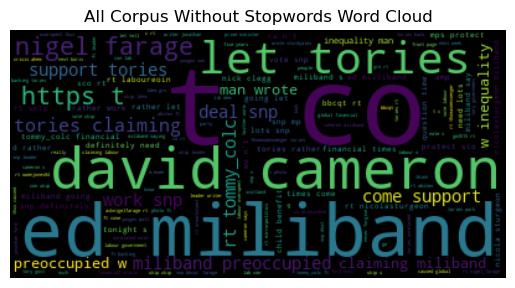

In [22]:
all_corpus_without_stopwords_wordcloud = WordCloud().generate(' '.join(all_corpus_tokens_without_stopwords))
plt.imshow(all_corpus_without_stopwords_wordcloud, interpolation='bilinear')
plt.title("All Corpus Without Stopwords Word Cloud")
plt.axis("off")
plt.show()

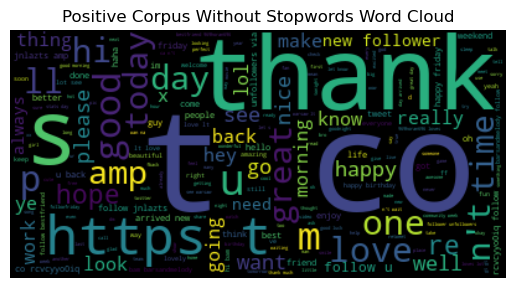

In [30]:
positive_corpus_without_stopwords_wordcloud = WordCloud().generate(' '.join(positive_corpus_tokens_without_stopwords))
plt.imshow(positive_corpus_without_stopwords_wordcloud, interpolation='bilinear')
plt.title("Positive Corpus Without Stopwords Word Cloud")
plt.axis("off")
plt.show()

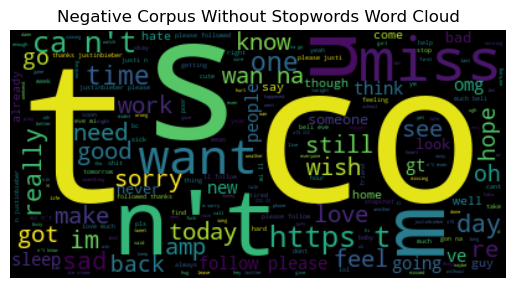

In [31]:
negative_corpus_without_stopwords_wordcloud = WordCloud().generate(' '.join(negative_corpus_tokens_without_stopwords))
plt.imshow(negative_corpus_without_stopwords_wordcloud, interpolation='bilinear')
plt.title("Negative Corpus Without Stopwords Word Cloud")
plt.axis("off")
plt.show()

# Stemming

In [25]:
stemmer = nltk.stem.PorterStemmer()

In [28]:
all_corpus_stemmed = [stemmer.stem(token) for token in all_corpus_tokens_without_stopwords]
positive_corpus_stemmed = [stemmer.stem(token) for token in positive_corpus_tokens_without_stopwords]
negative_corpus_stemmed = [stemmer.stem(token) for token in negative_corpus_tokens_without_stopwords]

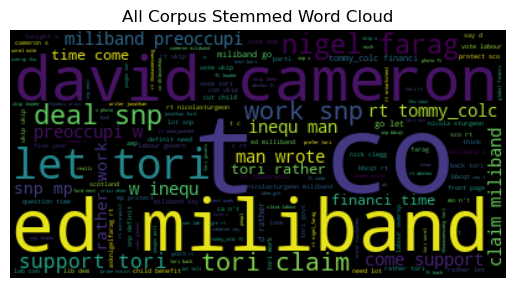

In [29]:
all_corpus_stemmed_wordcloud = WordCloud().generate(' '.join(all_corpus_stemmed))
plt.imshow(all_corpus_stemmed_wordcloud, interpolation='bilinear')
plt.title("All Corpus Stemmed Word Cloud")
plt.axis("off")
plt.show()

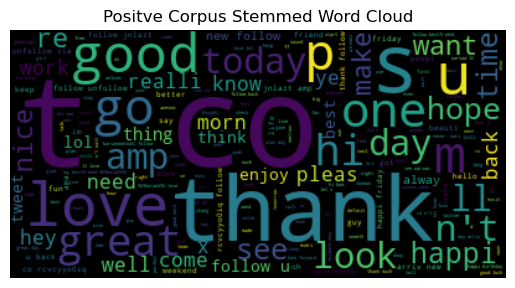

In [32]:
positive_corpus_stemmed_wordcloud = WordCloud().generate(' '.join(positive_corpus_stemmed))
plt.imshow(positive_corpus_stemmed_wordcloud, interpolation='bilinear')
plt.title("Positve Corpus Stemmed Word Cloud")
plt.axis("off")
plt.show()

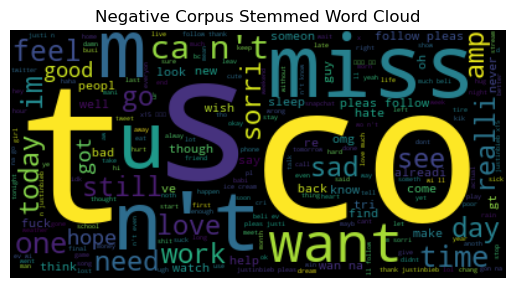

In [33]:
negative_corpus_stemmed_wordcloud = WordCloud().generate(' '.join(negative_corpus_stemmed))
plt.imshow(negative_corpus_stemmed_wordcloud, interpolation='bilinear')
plt.title("Negative Corpus Stemmed Word Cloud")
plt.axis("off")
plt.show()

# Lemmatization

In [38]:
nltk.download("wordnet")
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...


In [39]:
all_corpus_lemmatized = [lemmatizer.lemmatize(token) for token in all_corpus_stemmed]
positive_corpus_lemmatized = [lemmatizer.lemmatize(token) for token in positive_corpus_stemmed]
negative_corpus_lemmatized = [lemmatizer.lemmatize(token) for token in negative_corpus_stemmed]

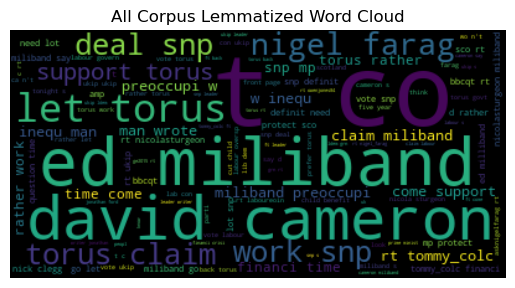

In [42]:
all_corpus_lemmatized_wordcloud = WordCloud().generate(' '.join(all_corpus_lemmatized))
plt.imshow(all_corpus_lemmatized_wordcloud, interpolation='bilinear')
plt.title("All Corpus Lemmatized Word Cloud")
plt.axis("off")
plt.show()

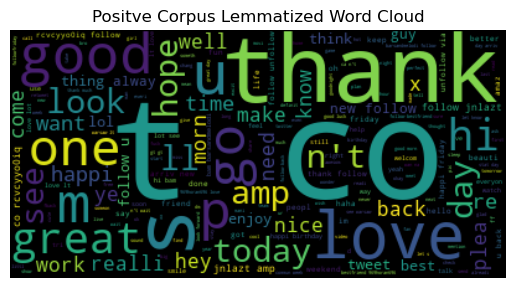

In [43]:
positive_corpus_lemmatized_wordcloud = WordCloud().generate(' '.join(positive_corpus_lemmatized))
plt.imshow(positive_corpus_lemmatized_wordcloud, interpolation='bilinear')
plt.title("Positve Corpus Lemmatized Word Cloud")
plt.axis("off")
plt.show()

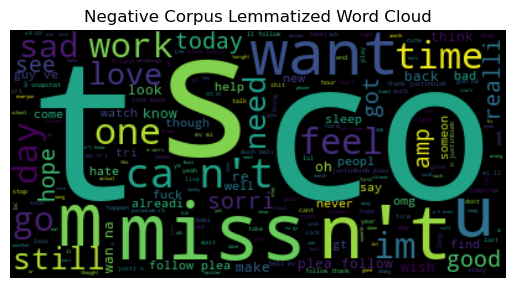

In [44]:
negative_corpus_lemmatized_wordcloud = WordCloud().generate(' '.join(negative_corpus_lemmatized))
plt.imshow(negative_corpus_lemmatized_wordcloud, interpolation='bilinear')
plt.title("Negative Corpus Lemmatized Word Cloud")
plt.axis("off")
plt.show()

# Tf-Idf

In [49]:
all_corpus_vectorizer = TfidfVectorizer()
positive_corpus_vectorizer = TfidfVectorizer()
negative_corpus_vectorizer = TfidfVectorizer()

In [50]:
all_corpus_vectorized = all_corpus_vectorizer.fit_transform(all_corpus_lemmatized)
positive_corpus_vectorized = positive_corpus_vectorizer.fit_transform(positive_corpus_lemmatized)
negative_corpus_vectorized = negative_corpus_vectorizer.fit_transform(negative_corpus_lemmatized)

In [52]:
all_corpus_vectorizer.get_feature_names_out()

array(['00', '000', '008aakkw4', ..., '英国総選挙', '英語記事', '鉄棒で金玉を潰そう'],
      dtype=object)

In [54]:
all_corpus_vectorized.shape

(371846, 16251)

In [55]:
positive_corpus_vectorizer.get_feature_names_out()

array(['00', '000', '009', ..., 'مطعم_هاشم', 'හව', '다쇼'], dtype=object)

In [56]:
positive_corpus_vectorized.shape

(62993, 11920)

In [57]:
negative_corpus_vectorizer.get_feature_names_out()

array(['00', '001', '00128835', ..., '인피니트', 'ｍｅ', 'ｓｅｅ'], dtype=object)

In [59]:
negative_corpus_vectorized.shape

(55648, 9440)